# Enron

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 because of a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 2, 2001, Enron employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

In this project, will be built an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

In [1]:
import sys
import pickle
import matplotlib.pyplot
sys.path.append("../tools/")
import numpy as np 
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

## Load the dictionary containing the dataset

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


C:\Users\Pro-Pc\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Dataset contains information about 146 persons with 21 features for each person and 18 POIs form 35 in total. 

In [2]:
# number of fratures for each person

features = {}

for key, value in data_dict.iteritems():
    features[key] = len(value)
print features

{'METTS MARK': 21, 'BAXTER JOHN C': 21, 'ELLIOTT STEVEN': 21, 'CORDES WILLIAM R': 21, 'HANNON KEVIN P': 21, 'MORDAUNT KRISTINA M': 21, 'MEYER ROCKFORD G': 21, 'MCMAHON JEFFREY': 21, 'HAEDICKE MARK E': 21, 'PIPER GREGORY F': 21, 'HUMPHREY GENE E': 21, 'NOLES JAMES L': 21, 'BLACHMAN JEREMY M': 21, 'SUNDE MARTIN': 21, 'GIBBS DANA R': 21, 'LOWRY CHARLES P': 21, 'COLWELL WESLEY': 21, 'MULLER MARK S': 21, 'JACKSON CHARLENE R': 21, 'WESTFAHL RICHARD K': 21, 'WALTERS GARETH W': 21, 'WALLS JR ROBERT H': 21, 'KITCHEN LOUISE': 21, 'CHAN RONNIE': 21, 'BELFER ROBERT': 21, 'SHANKMAN JEFFREY A': 21, 'WODRASKA JOHN': 21, 'BERGSIEKER RICHARD P': 21, 'URQUHART JOHN A': 21, 'BIBI PHILIPPE A': 21, 'RIEKER PAULA H': 21, 'WHALEY DAVID A': 21, 'BECK SALLY W': 21, 'HAUG DAVID L': 21, 'ECHOLS JOHN B': 21, 'MENDELSOHN JOHN': 21, 'HICKERSON GARY J': 21, 'CLINE KENNETH W': 21, 'LEWIS RICHARD': 21, 'HAYES ROBERT E': 21, 'KOPPER MICHAEL J': 21, 'LEFF DANIEL P': 21, 'LAVORATO JOHN J': 21, 'BERBERIAN DAVID': 21, 'DET

In [3]:
#number of POIs in dataset

count = 0
for key in data_dict:
    if data_dict[key]['poi']==True:
        count+=1
print count


18


For begining, is needed to create feature list and clean the data from outlayers and NaN values.

In [4]:
#print all features for one person to create feature list

print data_dict['METTS MARK']

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [5]:
#create full feature list

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'director_fees','expenses','loan_advances','long_term_incentive','other',
                 'restricted_stock','restricted_stock_deferred','exercised_stock_options','total_stock_value',
                 'to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi']

From plot there is observed an outlier which corresponeds to "TOTAL" and for all features we need to remove this value. 

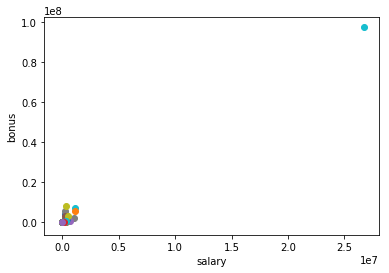

In [6]:
#NaN values will be replaced with 0 and features with all 0 values will be removed

data = featureFormat(data_dict, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = True)

for point in data:
    salary = point[2]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

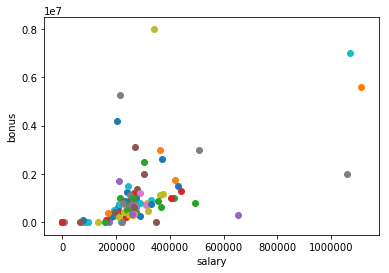

In [7]:
# remove outliers

data_dict.pop('TOTAL',0)

data = featureFormat(data_dict, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = True)
#plot again for check

for point in data:
    salary = point[2]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [8]:
# check features for correlation
return_list = [] 
for feature in range(0,20):
    tmp_list = []
    for key in data:
        value = key[feature]
        tmp_list.append( float(value) )
    return_list.append( np.array(tmp_list) )   

#cor,pval  = stats.pearsonr(return_list[15],return_list[19])    
    
import scipy.stats as stats
for i in range(0,20):
    for j in range(1,20):
        cor,pval  = stats.pearsonr(return_list[i],return_list[j])
        if 1>cor>abs(0.8):
            print (features_list[i], features_list[j] )
            print cor
            print "\n"  


('total_payments', 'loan_advances')
0.96425377599


('total_payments', 'other')
0.829874482789


('loan_advances', 'total_payments')
0.96425377599


('other', 'total_payments')
0.829874482789


('exercised_stock_options', 'total_stock_value')
0.963921426094


('total_stock_value', 'exercised_stock_options')
0.963921426094


('to_messages', 'shared_receipt_with_poi')
0.881534109523


('shared_receipt_with_poi', 'to_messages')
0.881534109523




Create feature fraction_from_poi and fraction_to_poi defined as number messages to/from POI (numerator) and number of all messages to/from a person (denominator).

In [9]:
def computeFraction( poi_messages, all_messages ):

    fraction = 0.
    
    if poi_messages!="NaN":
        if all_messages!="NaN":
            fraction = (poi_messages*1.0)/(all_messages*1.0)

        else:
            return 0
    else:
        return 0

    return fraction


submit_dict = {}
for name in data_dict:

    data_point = data_dict[name]

    
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    data_point["fraction_to_poi"] = fraction_to_poi
    
    
#####################

my_data = {}
my_data.update(submit_dict)  # Modifies my_data, not data
my_data.update(data_dict) 

In [10]:
features = {}

for key, value in my_data.iteritems():
    features[key] = len(value)
print (len(features))


145


Add new features to list and check for correlation and remove ones with correlation higher than 80%

In [11]:
#update features list 

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'director_fees','expenses','loan_advances','long_term_incentive','other',
                 'restricted_stock','restricted_stock_deferred','exercised_stock_options','total_stock_value',
                 'to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi','fraction_from_poi','fraction_to_poi']

data = featureFormat(my_data, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False)

   
return_list = [] 
for feature in range(0,22):
    tmp_list = []
    for key in data:
        value = key[feature]
        tmp_list.append( float(value) )
    return_list.append( np.array(tmp_list) )   

    
import scipy.stats as stats
for i in range(0,22):
    for j in range(0,22):
        cor,pval  = stats.pearsonr(return_list[i],return_list[j])
        if 1>cor>abs(0.8):
            print (features_list[i], features_list[j] )
            print cor
            print "\n"  


('total_payments', 'loan_advances')
0.96425377599


('total_payments', 'other')
0.829874482789


('loan_advances', 'total_payments')
0.96425377599


('other', 'total_payments')
0.829874482789


('exercised_stock_options', 'total_stock_value')
0.963921426094


('total_stock_value', 'exercised_stock_options')
0.963921426094


('to_messages', 'shared_receipt_with_poi')
0.881534109523


('shared_receipt_with_poi', 'to_messages')
0.881534109523




Can be removed 'from_poi_to_this_person','from_this_person_to_poi','to_messages','from_messages' as informaion from these variables are in newly created features, also 'exercised_stock_options', 'loan_advances', 'other' because of high correlation. Can be removed 'director_fees' as it has only 10% non 0 values and nan of them are POI.

In [12]:
# Director fees 

count =0
countP =0
for key in my_data:
    if my_data[key]['director_fees'] !='NaN':
        count += 1
        if my_data[key]['poi'] == True:
            countP += 1
        
print ("number of non0 director_fees", count, " number of POIs with non 0 director_fees", countP)

# Selected features list

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'expenses','long_term_incentive',
                 'restricted_stock','restricted_stock_deferred','total_stock_value',
                 'shared_receipt_with_poi','fraction_from_poi','fraction_to_poi']

data = featureFormat(my_data, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False)
labels, features = targetFeatureSplit(data)

('number of non0 director_fees', 16, ' number of POIs with non 0 director_fees', 0)


Pre-selected feature list is given to poi_id.py and built variety of classifyers to select the one which gives best f1 score. Tried GaussianNB, SVM, DecisionTreeClassifier and RandomForestm and used grid search to get best tuned parameters in order to get the best perfomance for each of them. There is created function which returns the best perfomance

In [16]:
#%run poi_id.py

As a result the best perfomance is given by DecisionTreeClassifier with 12 features. 

**Accuracy: 0.84   Precision: 0.40   Recall: 0.49   F1: 0.44   F2: 0.47**

Despite high accuracy, F1 score is less than 50%, which means that POI identification is not very reliably.

In [17]:
%run tester.py

Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=12, score_func=<function f_classif at 0x000000000A614DD8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.83567	Precision: 0.40420	Recall: 0.49050	F1: 0.44319	F2: 0.47041
	Total predictions: 15000	True positives:  981	False positives: 1446	False negatives: 1019	True negatives: 11554

